    Team :- 11


       D22014 – Chothani Jay Rameshbhai

       D22017 – Gowtham Kumar

       D22018 – Himanshu Yadav

In [ ]:
import pandas as pd

## 1.Reading the data

In [ ]:
data = pd.read_table('SMSSpamCollection',delimiter='\t',header=None)

In [ ]:
data.columns = ['Lables','SMS']

In [ ]:
data.head()

,Lables,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data = data.drop_duplicates()

In [ ]:
data.iloc[548]

Lables                                         ham
SMS       Having lunch:)you are not in online?why?
Name: 557, dtype: object

In [ ]:
data.shape

(5169, 2)

In [ ]:
data.reset_index(drop=True,inplace=True)

In [ ]:
data.head()

,Lables,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 2.  Text Pre-processing

In [ ]:
#1. Converting the text into lower cases
for i in range(len(data.SMS)):
    data.SMS[i] = data.SMS[i].lower()

In [ ]:
import nltk

In [ ]:
#2.removing stop words
# because stop words are common for all the sms and it can not help us to detect spam messages

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = stopwords.words("english")

In [ ]:
#Removing stopwords from all the SMS
for i in range(len(data)):
    data.SMS[i] = " ".join([w for w in data.SMS[i].split() if w not in stop_words])

In [ ]:
data.head()

,Lables,SMS
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around though"


In [ ]:
#Removing punctuation from all SMS
import string
p = string.punctuation
remv_punc = str.maketrans("", "", p)

In [ ]:
for i in range(len(data)):
    data.SMS[i] = data.SMS[i].translate(remv_punc)

In [ ]:
#lemetization

lm = nltk.WordNetLemmatizer()
for i in range(len(data)):
    data.SMS[i] = " ".join([lm.lemmatize(w) for w in data.SMS[i].split()])

In [ ]:
data.head()

,Lables,SMS
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


## 3. Data exploration

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
# creating string of spam and ham so that we can make word cloud
ham = ''
spam = ''
for i in range(len(data)):
    if data.Lables[i] == 'ham':
        ham += data.SMS[i]
    else:
        spam += data.SMS[i] 

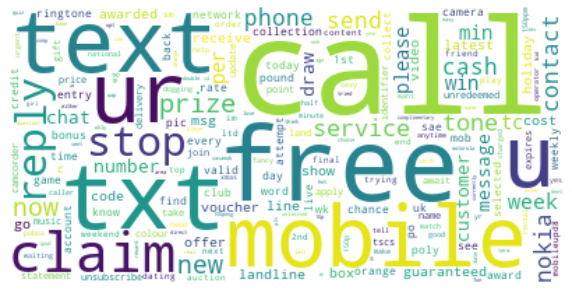

In [ ]:
#Wordcloud for spam SMS
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spam)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

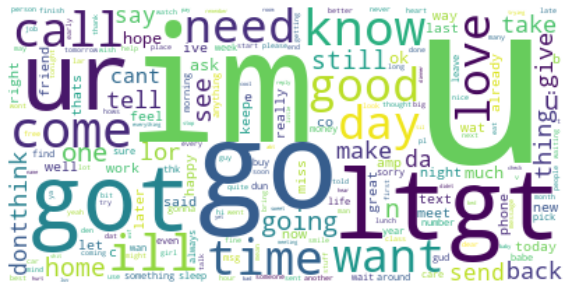

In [ ]:
#Wordcloud for not spam SMS
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(ham)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4. vectarization

#### a> TF vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer()
X = countvect.fit_transform(data.SMS)
X = X.toarray()

In [ ]:
#The word list
words = countvect.get_feature_names_out()
len(words)

8970

In [ ]:
DTM = pd.DataFrame(X,columns = words)
DTM.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### b> TF-IDF vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer()
tfidf_vectors = tfidf.fit_transform(data.SMS)
names = tfidf.get_feature_names_out()
tfidf_vectors = tfidf_vectors.toarray()
tfidf_vectors = pd.DataFrame(tfidf_vectors,columns=names)

In [ ]:
tfidf_vectors.head()

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zero,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### c> word to vec

In [ ]:
import pickle

In [ ]:
import nltk
from gensim.models import KeyedVectors

In [ ]:
embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

In [ ]:
embeddings

In [ ]:
import numpy as np

In [ ]:
#Word tokenization
vec_lis = []
from nltk import word_tokenize
for i in range(len(data)):
    #tokenizing sms into words
    words = word_tokenize(data.SMS[i])
    #checking if the word is presented in embeddings dictionary
    bag_nd = np.array([embeddings[word] for word in words if word in embeddings.key_to_index])
    #if not any word is presented into embeddings we are giving none
    if len(bag_nd)==0:
        vec = embeddings['none']
    #else fpr each word we are finding embeddings and adding all the vectors to get one
    else:
        vec = 0
        for i in range(len(bag_nd)):
            vec += bag_nd[i]
    vec_lis.append(vec)

In [ ]:
len(vec_lis)

5169

In [ ]:
#creating dictionary for each element of vector so that we can get dataframe with 300 columns
Dic = {}
for i in range(300):
    lis = []
    #we are ittrating each vector for it's ith element and creating a list of it
    for j in range(len(vec_lis)):
        lis.append(vec_lis[j][i])
    Dic[i] = lis

In [ ]:
#giving this SMS lables 
Dic['Lable'] = list(data.Lables)

In [ ]:
word2vec = pd.DataFrame(Dic)

In [ ]:
word2vec.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Lable
0,-0.277283,0.723389,0.379395,3.061523,-0.434479,0.545715,1.147522,-1.344482,0.200500,1.083086,...,0.594177,-1.650635,1.291077,0.080200,-0.458130,0.387207,-1.118958,-0.733032,0.424713,ham
1,-0.379410,0.482300,0.365662,0.614990,-0.473145,0.211426,-0.318237,-0.440613,0.060303,0.483765,...,0.634033,-0.806580,-0.247925,-1.007812,-0.972656,-0.836426,-0.685150,-0.437256,0.655273,ham
2,0.013405,-0.507935,-1.219238,1.262939,1.145691,0.447624,-0.142944,-1.488251,0.719482,2.141296,...,0.372314,-0.242859,-0.183105,0.231079,0.006836,-0.082611,-2.170883,-1.645866,0.184910,spam
3,-0.591125,0.235931,0.973389,0.782776,-1.006348,0.004631,-0.400513,-0.938232,-0.049805,1.060059,...,0.553711,-0.416077,-0.128418,-0.598145,-1.251221,-0.859444,-0.646484,-0.136230,0.998901,ham
4,-0.122314,0.207062,0.358887,1.405762,0.001587,0.078857,0.451782,-0.517372,0.700928,0.622942,...,0.841919,-0.882324,0.304077,-0.887665,0.074951,0.125488,-0.386597,0.353329,0.043823,ham


In [ ]:
word2vec.shape

(5169, 301)

### d> heuristic features

In [ ]:
df_huristic = data.copy()
df_huristic['phone number'] = 0

for i in range(len(data)):
    phone = False
    words = data.SMS[i].split()
    for word in words:
        try:
            word = int(word)
            #if word is greaterthan 100000000 it is taking as number 
            if word > 100000000 & word <10000000000:
                phone = True 
                break
        except:
            pass
    #if pphone number is presented in SMS we are giving 1
    if phone:
        df_huristic.loc[i,'phone number'] = 1
        
df_huristic.head()

,Lables,SMS,phone number
0,ham,go jurong point crazy available bugis n great ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1
3,ham,u dun say early hor u c already say,0
4,ham,nah think go usf life around though,0


In [ ]:
# creating column named length wich is showing length of SMS
df_huristic['length'] = df_huristic.SMS.str.len()

In [ ]:
df_huristic.head()

,Lables,SMS,phone number,length
0,ham,go jurong point crazy available bugis n great ...,0,82
1,ham,ok lar joking wif u oni,0,23
2,spam,free entry 2 wkly comp win fa cup final tkts 2...,1,135
3,ham,u dun say early hor u c already say,0,35
4,ham,nah think go usf life around though,0,35


##  Dimension Reduction

### a>PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(DTM)
principaltf = pd.DataFrame(data = principalComponents)

principaltf

,0,1,2,3,4,5,6,7,8,9,...,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125
0,0.164768,-0.144694,-0.009628,-0.116952,0.036427,0.127137,-0.223146,0.933510,0.352399,-0.117099,...,-0.016288,0.031550,0.000224,0.030764,-0.049881,0.005701,-0.014323,-0.046945,-0.020533,-0.021356
1,0.113412,-0.158611,-0.061409,-0.195892,-0.137281,-0.091113,0.075765,0.116247,0.191938,0.203591,...,-0.012650,0.006851,-0.023719,-0.021486,0.012610,-0.025161,-0.001180,-0.001135,-0.006539,-0.033516
2,-0.590110,0.132233,0.626832,0.126743,-0.487277,0.466774,0.761857,0.149916,-0.255685,-0.101022,...,0.006607,-0.004817,-0.016968,-0.005753,0.003452,-0.024531,0.017704,0.000691,-0.005188,0.001433
3,0.160242,-0.084904,-0.045526,-0.171031,-0.105015,-0.053160,0.011928,0.088709,0.042264,0.092881,...,-0.000713,-0.015581,-0.002816,0.009128,-0.003422,-0.000370,0.003613,-0.010923,0.023261,0.001998
4,0.173938,-0.116400,0.062651,-0.097162,0.107629,0.163480,-0.248526,0.655765,0.131706,-0.266584,...,0.008912,0.002250,0.000813,0.024598,-0.011667,-0.016211,-0.022849,0.001119,-0.003838,0.002282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,-1.112827,0.300345,-0.537938,-0.171258,0.337587,-0.315326,-0.371923,-0.087700,0.013029,0.168562,...,-0.029461,-0.011632,-0.010822,-0.018583,0.000869,-0.001021,0.011208,-0.007035,0.019378,-0.017025
5165,0.123494,-0.156764,-0.117033,-0.041595,-0.112296,-0.070742,0.102572,0.025002,0.096392,0.023981,...,-0.029905,0.023881,0.011260,0.001773,0.011857,-0.032382,0.013574,-0.004543,-0.051071,0.010781
5166,0.082931,-0.109725,-0.061806,-0.185397,-0.088440,-0.017377,0.100970,-0.077265,-0.008864,-0.029299,...,0.007053,0.023179,-0.037278,0.023658,-0.031976,-0.042728,0.000658,-0.037441,0.038285,0.039932
5167,-0.194909,0.069986,0.278228,0.106415,-0.314576,0.313142,0.205968,0.113116,-0.437072,0.466489,...,0.006176,-0.048506,0.004934,-0.005792,-0.019350,-0.046787,-0.002466,-0.047119,-0.003633,0.021655


In [ ]:
principalComponents = pca.fit_transform(tfidf_vectors)
principalTFIDF = pd.DataFrame(data = principalComponents)

principalTFIDF

,0,1,2,3,4,5,6,7,8,9,...,2867,2868,2869,2870,2871,2872,2873,2874,2875,2876
0,0.011641,-0.040332,-0.021673,-0.043254,-0.059713,-0.024133,-0.049485,-0.025503,0.032395,-0.034151,...,0.008342,-0.000621,-0.005146,-0.000598,0.002795,-0.001656,0.010618,-0.007785,0.008777,0.003444
1,0.249769,0.055250,-0.055278,-0.011600,0.034097,-0.008730,0.036536,0.023070,-0.049737,-0.007315,...,0.006356,-0.007345,0.003230,0.000584,0.005904,-0.007626,-0.010096,-0.012245,-0.000493,0.018708
2,-0.041083,0.048242,-0.029776,-0.018662,-0.028728,-0.014236,0.035399,0.091536,-0.015338,-0.029081,...,0.004360,0.000529,-0.001058,0.009311,-0.001646,-0.008480,0.002872,0.000863,-0.006471,0.011231
3,0.024938,-0.043299,-0.027104,-0.026432,-0.056419,-0.058233,-0.031211,-0.030849,-0.021814,0.000370,...,-0.013087,-0.009610,-0.043070,0.011591,0.009416,0.003132,0.014899,-0.030634,-0.017298,-0.005580
4,0.005007,-0.061856,-0.024825,0.012306,-0.024983,-0.016675,-0.063353,0.017186,0.036896,0.008324,...,0.000121,0.007800,-0.000457,0.002395,0.001081,0.000188,0.001357,-0.001001,-0.002107,-0.005066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,-0.075778,0.195146,-0.027347,-0.040198,-0.038884,0.017744,0.042095,-0.056309,0.042959,0.007690,...,0.002601,-0.001659,-0.006489,-0.012130,0.011202,-0.004387,-0.005032,0.002601,-0.009403,0.010865
5165,0.034295,-0.056072,0.178633,-0.091501,-0.037551,-0.000150,0.083589,-0.056845,0.020384,-0.112891,...,-0.001395,-0.001809,0.000291,-0.006076,-0.003668,-0.002191,0.000628,0.010461,-0.004749,-0.007301
5166,-0.013957,-0.017783,-0.027395,-0.006922,-0.004646,-0.011819,-0.004703,0.000397,-0.036998,0.005917,...,0.007138,-0.001422,0.001871,0.005247,-0.003223,-0.000786,0.017453,-0.004755,0.006961,-0.006299
5167,-0.034273,0.007639,-0.025046,0.016198,-0.016323,-0.052746,0.015993,0.050903,-0.003701,0.029403,...,0.016133,-0.004694,-0.008046,0.021991,0.013076,0.002160,0.009455,0.001240,0.002666,0.010890


In [ ]:
word2vec.columns = word2vec.columns.astype(str)

In [ ]:
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(word2vec.drop('Lable',axis=1))
principalW2v = pd.DataFrame(data = principalComponents)
principalW2v

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,5.295211,-2.013082,0.461033,1.192273,-0.294024,-1.099127,1.821453,1.264963,3.338679,-0.746336,...,-0.023942,0.233302,0.039479,-0.201244,-0.366708,0.331773,0.142666,0.301393,0.081112,-0.073625
1,0.496766,-5.568244,-2.151416,-0.132795,0.751343,0.137493,0.466048,-0.695719,-0.160092,0.645833,...,0.401858,-0.146913,-0.171121,-0.044760,0.263362,0.152715,-0.200139,0.282183,0.213876,-0.035439
2,6.418026,-3.434268,9.282784,1.989804,-2.052062,-0.344949,-0.790073,1.446172,2.184887,-1.673857,...,0.131109,-0.610708,0.704225,-0.413843,0.133243,0.275866,-0.128477,-0.162064,-1.013461,-0.812869
3,1.928184,-4.108101,-1.289105,-0.882544,-1.861062,1.403901,0.652222,-0.090682,-0.302720,0.049758,...,-0.037273,-0.207350,-0.194408,-0.005583,0.027206,0.254591,-0.079076,0.088304,0.147660,-0.063232
4,-1.498357,0.552405,-2.109970,-0.303990,-0.643532,-0.564346,0.332549,0.223775,0.377597,0.215706,...,-0.230855,-0.079080,0.074539,-0.061150,-0.129068,0.029373,0.247317,-0.391785,0.113506,-0.050665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,3.525945,0.025917,4.730467,2.273709,-2.611789,2.330867,-2.122447,0.415293,-3.225143,0.240975,...,0.304483,0.179830,-0.178752,0.363406,-0.227770,-0.396904,0.231778,-0.014749,0.293764,-0.187646
5165,-2.470753,-2.885764,0.313794,1.232398,-1.545570,1.196415,0.745102,0.375247,-0.022481,-0.834934,...,-0.053185,0.521856,0.053708,0.242808,-0.143367,0.270747,-0.120351,-0.416314,0.033085,0.319880
5166,-4.959546,1.032901,-0.855124,-0.069286,0.921420,0.733476,0.891817,0.316514,-0.008145,0.781614,...,0.075868,0.039592,0.024815,0.121108,0.378233,-0.091819,0.085575,-0.078322,0.216776,-0.014082
5167,4.500572,3.635634,-0.230365,-1.298420,0.168353,-1.428691,-0.995468,0.266339,-0.648008,1.106341,...,-0.127836,0.340266,-0.095927,-0.324133,0.410384,0.029019,-0.444048,0.040553,-0.365510,-0.331333


### b> visulizing across 2 PCs

In [ ]:
# Creating empty data frame to add 1st 2 pcs of each 
principalDf_Vis = pd.DataFrame()
principalDf_Vis['tf_PC1'] = principaltf.iloc[:, 0]
principalDf_Vis['tf_PC2'] = principaltf.iloc[:, 1]
principalDf_Vis['tfidf_PC1'] = principalTFIDF.iloc[:, 0]
principalDf_Vis['tfidf_PC2'] = principalTFIDF.iloc[:, 1]
principalDf_Vis['w2v_PC1'] = principalW2v.iloc[:, 0]
principalDf_Vis['w2v_PC2'] = principalW2v.iloc[:, 1]
principalDf_Vis['Label'] = data.Lables

In [ ]:
principalDf_Vis

,tf_PC1,tf_PC2,tfidf_PC1,tfidf_PC2,w2v_PC1,w2v_PC2,Label
0,0.164768,-0.144694,0.011641,-0.040332,5.295211,-2.013082,ham
1,0.113412,-0.158611,0.249769,0.055250,0.496766,-5.568244,ham
2,-0.590110,0.132233,-0.041083,0.048242,6.418026,-3.434268,spam
3,0.160242,-0.084904,0.024938,-0.043299,1.928184,-4.108101,ham
4,0.173938,-0.116400,0.005007,-0.061856,-1.498357,0.552405,ham
...,...,...,...,...,...,...,...
5164,-1.112827,0.300345,-0.075778,0.195146,3.525945,0.025917,spam
5165,0.123494,-0.156764,0.034295,-0.056072,-2.470753,-2.885764,ham
5166,0.082931,-0.109725,-0.013957,-0.017783,-4.959546,1.032901,ham
5167,-0.194909,0.069986,-0.034273,0.007639,4.500572,3.635634,ham


In [ ]:
import seaborn as sns

<AxesSubplot: xlabel='tf_PC1', ylabel='tf_PC2'>

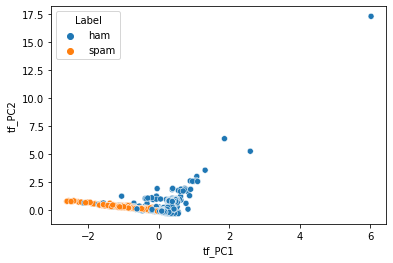

In [ ]:
sns.scatterplot(x = principalDf_Vis["tf_PC1"], y = principalDf_Vis["tf_PC2"], data = principalDf_Vis, hue = principalDf_Vis["Label"])

<AxesSubplot: xlabel='tfidf_PC1', ylabel='tfidf_PC2'>

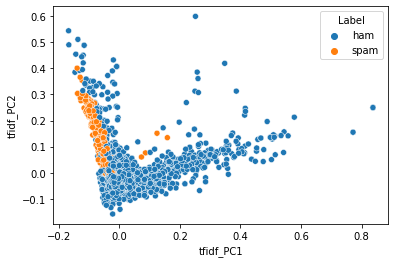

In [ ]:
sns.scatterplot(x = principalDf_Vis["tfidf_PC1"], y = principalDf_Vis["tfidf_PC2"], data = principalDf_Vis, hue = principalDf_Vis["Label"])

<AxesSubplot: xlabel='w2v_PC1', ylabel='w2v_PC2'>

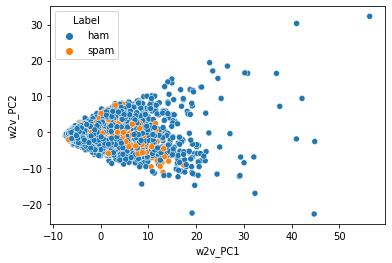

In [ ]:
sns.scatterplot(x = principalDf_Vis["w2v_PC1"], y = principalDf_Vis["w2v_PC2"], data = principalDf_Vis, hue = principalDf_Vis["Label"])

### c> heuristic approaches

In [ ]:
#removing colums which has value less than 1%
#ceratin dataframe to store the value in ech columns
df = pd.DataFrame(DTM.apply(lambda x: (np.sum(x)/len(x))*100, axis=0),columns=['value'])

#storing columns as freaquent which are apearing more than 1% sms
frequent = list(df.loc[df.value>0.1].index)

#slecting frequent columns only
DTM_reduced = DTM[frequent]
DTM_reduced.shape,DTM.shape

((5169, 1332), (5169, 8970))

In [ ]:
#removing colums which has value less than 1%
#ceratin dataframe to store the value in ech columns
df = pd.DataFrame(tfidf_vectors.apply(lambda x: (np.sum(x)/len(x))*100, axis=0),columns=['value'])

#storing columns as freaquent which are apearing more than 1% sms
frequent = list(df.loc[df.value>0.1].index)

#slecting frequent columns only
tfidf_vectors_reduced = tfidf_vectors[frequent]
tfidf_vectors_reduced.shape,tfidf_vectors.shape

((5169, 514), (5169, 8970))

## 6. spam filter

In [ ]:
#labling spam=1 and ham=0
DTM_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})

C:\Users\Dell\AppData\Local\Temp\ipykernel_24056\212494436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DTM_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})


In [ ]:
tfidf_vectors_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})

C:\Users\Dell\AppData\Local\Temp\ipykernel_24056\137577973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tfidf_vectors_reduced['Label'] = data.Lables.map({'ham':0, 'spam':1})


In [ ]:
word2vec['Label'] = data.Lables.map({'ham':0, 'spam':1})

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report

# Models on TF

In [ ]:
x=DTM_reduced.drop('Label',axis=1)
y=DTM_reduced.Label

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

### Baseline Models

In [ ]:
def models(X_train, y_train, X_valid, y_valid):
    df_models = pd.DataFrame(columns = ["Model Number", "Model Name", "F1 Train","F1 Valid", 
                                    "Accuracy Train", "Accuracy Valid"])
    models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), SVC(),
             BaggingClassifier()]
    model_name = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", 
                  "Adaboost Classifier", "SVC", "Bagging Classifier"]
    i = 1
    for model,model_name in zip(models, model_name):
        print(model)
        model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_valid = model.predict(X_valid)
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_valid = accuracy_score(y_valid, y_pred_valid)
        f1_train = f1_score(y_train, y_pred_train)
        f1_valid = f1_score(y_train, y_pred_train)
        df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid, 
                                      "Accuracy Train":accuracy_train, "Accuracy Valid":accuracy_valid},
                                    ignore_index=True)
        i = i + 1
    return df_models

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

def results(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

In [ ]:
df_models = models(X_train, y_train, X_valid, y_valid)

LogisticRegression()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


DecisionTreeClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


RandomForestClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


AdaBoostClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


SVC()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


BaggingClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


In [ ]:
df_models

,Model Number,Model Name,F1 Train,F1 Valid,Accuracy Train,Accuracy Valid
0,1,Logistic Regression,0.973535,0.973535,0.973559,0.954613
1,2,Decision Tree Classifier,0.988574,0.988574,0.988701,0.911439
2,3,Random Forest Classifier,0.988579,0.988579,0.988701,0.934317
3,4,Adaboost Classifier,0.809152,0.809152,0.839774,0.815129
4,5,SVC,0.958825,0.958825,0.958192,0.928413
5,6,Bagging Classifier,0.982058,0.982058,0.982147,0.920295


# LogisticRegression

In [ ]:
## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_logit  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

({'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}, 0.9430508474576271)

In [ ]:
lr = LogisticRegression(penalty = 'l2', solver = 'newton-cg', C = 1)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       959
           1       0.92      0.98      0.95       938

    accuracy                           0.95      1897
   macro avg       0.95      0.95      0.95      1897
weighted avg       0.95      0.95      0.95      1897

[[884  75]
 [ 19 919]]


# DecisionTreeClassifier

In [ ]:
## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [20, 30, 40, 50], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

In [ ]:
model = DecisionTreeClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_dtf  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'entropy'},
 0.8108474576271186)

In [ ]:
dt = DecisionTreeClassifier(max_depth= 50, min_samples_leaf= 10, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       959
           1       0.92      0.69      0.79       938

    accuracy                           0.82      1897
   macro avg       0.84      0.82      0.81      1897
weighted avg       0.84      0.82      0.81      1897

[[899  60]
 [288 650]]


# RandomForestClassifier

In [ ]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20,25,30], 
              "min_samples_leaf" : [3,5,7,9,11,13], "n_estimators" : [50,100,150], "max_features" : [5,7,9,11] }

In [ ]:
model = RandomForestClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_rfc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'n_estimators': 50,
  'min_samples_leaf': 5,
  'max_leaf_nodes': 30,
  'max_features': 9,
  'max_depth': 13},
 0.7988700564971751)

In [ ]:
rfc = RandomForestClassifier(max_depth= 13, min_samples_leaf= 5, max_features= 11, max_leaf_nodes= 20,n_estimators= 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.74      0.98      0.84       959
           1       0.96      0.65      0.78       938

    accuracy                           0.82      1897
   macro avg       0.85      0.81      0.81      1897
weighted avg       0.85      0.82      0.81      1897

[[936  23]
 [327 611]]


# AdaBoostClassifier

In [ ]:
## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [20,100,225]}

In [ ]:
model = AdaBoostClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_adc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

In [ ]:
abc = AdaBoostClassifier(n_estimators=225 )
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.87      0.92       959
           1       0.88      0.97      0.93       938

    accuracy                           0.92      1897
   macro avg       0.93      0.92      0.92      1897
weighted avg       0.93      0.92      0.92      1897

[[839 120]
 [ 24 914]]


# BaggingClassifier

In [ ]:
## Tuning Parameters for Bagging Classifier
params_bc = {'n_estimators':[10,15]}

In [ ]:
model = BaggingClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_bc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

In [ ]:
bc = BaggingClassifier(n_estimators=10 )
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       959
           1       0.88      0.98      0.93       938

    accuracy                           0.92      1897
   macro avg       0.93      0.93      0.92      1897
weighted avg       0.93      0.92      0.92      1897

[[837 122]
 [ 21 917]]


# SVC

In [ ]:
## Tuning Parameters for SUpport Vector Classifier
params_svc = {'kernel':['sigmoid'], 'C': [10, 1.0], 'gamma': ['scale']}

In [ ]:
model = SVC()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_svc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

F:\installations\envs\common\lib\site-packages\sklearn\model_selection\_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


({'kernel': 'sigmoid', 'gamma': 'scale', 'C': 1.0}, 0.9166101694915254)

In [ ]:
svc = SVC(kernel= 'sigmoid' ,gamma = 'scale' , C = 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       959
           1       0.94      0.97      0.95       938

    accuracy                           0.95      1897
   macro avg       0.95      0.95      0.95      1897
weighted avg       0.95      0.95      0.95      1897

[[899  60]
 [ 28 910]]


## Models on tfidf

In [ ]:
x=tfidf_vectors_reduced.drop('Label',axis=1)
y=tfidf_vectors_reduced.Label

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
df_models = models(X_train, y_train, X_valid, y_valid)

LogisticRegression()
DecisionTreeClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,
C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


RandomForestClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


AdaBoostClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


SVC()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


BaggingClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


In [ ]:
df_models

,Model Number,Model Name,F1 Train,F1 Valid,Accuracy Train,Accuracy Valid
0,1,Logistic Regression,0.914409,0.914409,0.919322,0.914760
1,2,Decision Tree Classifier,0.998396,0.998396,0.998418,0.957565
2,3,Random Forest Classifier,0.998396,0.998396,0.998418,0.974908
3,4,Adaboost Classifier,0.954018,0.954018,0.955254,0.949077
4,5,SVC,0.973420,0.973420,0.973107,0.964576
5,6,Bagging Classifier,0.994500,0.994500,0.994576,0.966790


# LogisticRegression

In [ ]:
## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_logit  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

({'solver': 'liblinear', 'penalty': 'l2', 'C': 100}, 0.9536723163841808)

In [ ]:
lr = LogisticRegression(penalty = 'l2', solver = 'liblinear', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96       916
           1       0.94      0.99      0.96       981

    accuracy                           0.96      1897
   macro avg       0.96      0.96      0.96      1897
weighted avg       0.96      0.96      0.96      1897

[[855  61]
 [ 14 967]]


# DecisionTreeClassifier

In [ ]:
## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [20, 30, 40, 50], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

In [ ]:
model = DecisionTreeClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_dtf  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'min_samples_leaf': 10, 'max_depth': 30, 'criterion': 'entropy'},
 0.927683615819209)

In [ ]:
dt = DecisionTreeClassifier(max_depth= 30, min_samples_leaf= 5, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       916
           1       0.96      0.95      0.96       981

    accuracy                           0.96      1897
   macro avg       0.96      0.96      0.96      1897
weighted avg       0.96      0.96      0.96      1897

[[882  34]
 [ 51 930]]


# RandomForestClassifier

In [ ]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20,25,30], 
              "min_samples_leaf" : [3,5,7,9,11,13], "n_estimators" : [50,100,150], "max_features" : [5,7,9,11] }

In [ ]:
model = RandomForestClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_rfc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'n_estimators': 100,
  'min_samples_leaf': 5,
  'max_leaf_nodes': 15,
  'max_features': 9,
  'max_depth': 13},
 0.9236158192090397)

In [ ]:
rfc = RandomForestClassifier(max_depth= 13, min_samples_leaf= 5, max_features= 9, max_leaf_nodes= 15,n_estimators= 100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       916
           1       0.99      0.87      0.93       981

    accuracy                           0.93      1897
   macro avg       0.94      0.93      0.93      1897
weighted avg       0.94      0.93      0.93      1897

[[907   9]
 [123 858]]


# AdaBoostClassifier

In [ ]:
## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [10,20,35,50,75,100,125,150,175,200,225,250]}

In [ ]:
model = AdaBoostClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_adc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

In [ ]:
abc = AdaBoostClassifier(n_estimators=225 )
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       916
           1       0.98      0.98      0.98       981

    accuracy                           0.98      1897
   macro avg       0.98      0.98      0.98      1897
weighted avg       0.98      0.98      0.98      1897

[[893  23]
 [ 18 963]]


# BaggingClassifier

In [ ]:
## Tuning Parameters for Bagging Classifier
params_bc = {'n_estimators':[10,15]}

In [ ]:
model = BaggingClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_bc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

In [ ]:
bc = BaggingClassifier(n_estimators=15 )
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       916
           1       0.96      0.98      0.97       981

    accuracy                           0.97      1897
   macro avg       0.97      0.97      0.97      1897
weighted avg       0.97      0.97      0.97      1897

[[874  42]
 [ 15 966]]


# SVC

In [ ]:
## Tuning Parameters for SUpport Vector Classifier
params_svc = {'kernel':['poly', 'rbf', 'sigmoid'], 'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale']}

In [ ]:
model = SVC()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_svc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'kernel': 'rbf', 'gamma': 'scale', 'C': 50}, 0.967683615819209)

In [ ]:
svc = SVC(kernel= 'rbf' ,gamma = 'scale' , C = 50)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       916
           1       0.98      0.97      0.98       981

    accuracy                           0.98      1897
   macro avg       0.98      0.98      0.98      1897
weighted avg       0.98      0.98      0.98      1897

[[901  15]
 [ 25 956]]


# Models on word2vec

In [ ]:
word2vec['Lable'] = data.Lables.map({'ham':0, 'spam':1})

In [ ]:
x=word2vec.drop('Lable',axis=1)
y=word2vec.Lable

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.3)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
df_models = models(X_train, y_train, X_valid, y_valid)

LogisticRegression()


F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


DecisionTreeClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


RandomForestClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


AdaBoostClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


SVC()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


BaggingClassifier()


C:\Users\Dell\AppData\Local\Temp\ipykernel_13448\72801302.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_models = df_models.append({'Model Number':i, "Model Name": model_name, "F1 Train":f1_train, "F1 Valid":f1_valid,


In [ ]:
df_models

,Model Number,Model Name,F1 Train,F1 Valid,Accuracy Train,Accuracy Valid
0,1,Logistic Regression,0.989812,0.989812,0.989831,0.964576
1,2,Decision Tree Classifier,0.999549,0.999549,0.999548,0.915129
2,3,Random Forest Classifier,0.999549,0.999549,0.999548,0.976384
3,4,Adaboost Classifier,0.978771,0.978771,0.978757,0.951661
4,5,SVC,0.978519,0.978519,0.978757,0.964576
5,6,Bagging Classifier,0.996612,0.996612,0.996610,0.947232


# LogisticRegression

In [ ]:
## Tuning Parameters for Logistic Regression
params_logit = {'solver' :['newton-cg', 'lbfgs', 'liblinear'] , 'penalty' : ['l2'], 
                'C' : [100, 10, 1.0, 0.1, 0.01]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_logit  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
F:\installations\envs\common\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
F:\installations\envs\common\lib\site-packages\sklearn\utils\optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
F:\installations\envs\common\lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search a

({'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}, 0.9685875706214689)

In [ ]:
lr = LogisticRegression(penalty = 'l2', solver = 'lbfgs', C = 100)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       957
           1       0.94      0.99      0.97       940

    accuracy                           0.97      1897
   macro avg       0.97      0.97      0.97      1897
weighted avg       0.97      0.97      0.97      1897

[[897  60]
 [  6 934]]


F:\installations\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# DecisionTreeClassifier

In [ ]:
## Tuning Parameters for Decision Tree Classifier
params_dtf = {'max_depth': [20, 30, 40, 50], 'min_samples_leaf': [5, 10, 20, 50], 
              'criterion': ["gini", "entropy"]}

In [ ]:
model = DecisionTreeClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_dtf  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'min_samples_leaf': 5, 'max_depth': 40, 'criterion': 'entropy'},
 0.9199999999999999)

In [ ]:
dt = DecisionTreeClassifier(max_depth= 40, min_samples_leaf= 5, criterion='entropy')
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       957
           1       0.92      0.95      0.94       940

    accuracy                           0.93      1897
   macro avg       0.94      0.93      0.93      1897
weighted avg       0.94      0.93      0.93      1897

[[878  79]
 [ 45 895]]


# RandomForestClassifier

In [ ]:
## Tuning Parameters for Random Forest Classifier
params_rfc = { "max_depth" : [5,7,9,11,13], "max_leaf_nodes" : [10,15,20,25,30], 
              "min_samples_leaf" : [3,5,7,9,11,13], "n_estimators" : [50,100,150], "max_features" : [5,7,9,11] }

In [ ]:
model = RandomForestClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_rfc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'n_estimators': 150,
  'min_samples_leaf': 5,
  'max_leaf_nodes': 25,
  'max_features': 7,
  'max_depth': 13},
 0.9398870056497175)

In [ ]:
rfc = RandomForestClassifier(max_depth= 13, min_samples_leaf= 5, max_features= 7, max_leaf_nodes= 25,n_estimators= 150)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       957
           1       0.97      0.92      0.94       940

    accuracy                           0.94      1897
   macro avg       0.95      0.94      0.94      1897
weighted avg       0.95      0.94      0.94      1897

[[927  30]
 [ 76 864]]


# AdaBoostClassifier

In [ ]:
## Tuning Parameters for Ada Boost Classifier
params_adc = {"n_estimators" : [10,50,100,225]}

In [ ]:
model = AdaBoostClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_adc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

In [ ]:
abc = AdaBoostClassifier(n_estimators=225 )
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       957
           1       0.97      0.99      0.98       940

    accuracy                           0.98      1897
   macro avg       0.98      0.98      0.98      1897
weighted avg       0.98      0.98      0.98      1897

[[930  27]
 [  9 931]]


# BaggingClassifier

In [ ]:
## Tuning Parameters for Bagging Classifier
params_bc = {'n_estimators':[10,15]}

In [ ]:
model = BaggingClassifier()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_bc  )

# Fit with data
clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

In [ ]:
bc = BaggingClassifier(n_estimators=15 )
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       957
           1       0.95      0.97      0.96       940

    accuracy                           0.96      1897
   macro avg       0.96      0.96      0.96      1897
weighted avg       0.96      0.96      0.96      1897

[[912  45]
 [ 24 916]]


# SVC

In [ ]:
## Tuning Parameters for SUpport Vector Classifier
params_svc = {'kernel':['poly', 'rbf', 'sigmoid'], 'C': [50, 10, 1.0, 0.1, 0.01], 'gamma': ['scale']}

In [ ]:
model = SVC()  ## Model to tune

# make Grid Search CV object
clf = RandomizedSearchCV(model, param_distributions=params_svc  )

# Fit with data

clf.fit(X_train, y_train)

# See the best values we obtain
clf.best_params_, clf.best_score_

({'kernel': 'rbf', 'gamma': 'scale', 'C': 1.0}, 0.9694915254237289)

In [ ]:
svc = SVC(kernel= 'rbf' ,gamma = 'scale' , C = 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
results(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       957
           1       0.98      0.96      0.97       940

    accuracy                           0.97      1897
   macro avg       0.97      0.97      0.97      1897
weighted avg       0.97      0.97      0.97      1897

[[943  14]
 [ 34 906]]


# conclusion:
        
        For TF vectorized data we are getting highest F1 score for both classes 0.95 with SVC and LogisticRegression.
        For TF-IDF vectorized data we are getting highrst f1 score 0.98 with SVC.
        for word 2 vec all models are giving f1 score more than 0.93.
        as per our experiment we can see that SVC is giving us very good results for all the type of data.
        AND word 2 vec model is giving good results with all models compare to other vetoried data.
        